<a href="https://colab.research.google.com/github/Karthikreddy1010/kaggle_competitions/blob/main/used_car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
train_df=pd.read_csv("used_car_train.csv")
train_df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
train_df.shape

(188533, 13)

In [ ]:
train_df.describe()

id     model_year         milage         price
count  188533.000000  188533.000000  188533.000000  1.885330e+05
mean    94266.000000    2015.829998   65705.295174  4.387802e+04
std     54424.933488       5.660967   49798.158076  7.881952e+04
min         0.000000    1974.000000     100.000000  2.000000e+03
25%     47133.000000    2013.000000   24115.000000  1.700000e+04
50%     94266.000000    2017.000000   57785.000000  3.082500e+04
75%    141399.000000    2020.000000   95400.000000  4.990000e+04
max    188532.000000    2024.000000  405000.000000  2.954083e+06

In [ ]:
train_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [ ]:
miss_value_per=pd.DataFrame(train_df.isnull().sum()/len(train_df)*100)
fig=px.bar(miss_value_per)
fig.update_layout(yaxis_title='percentage',
                 title='Missing values in percentage')
fig.show()

## It shows percentage of null values in a dataset

In [ ]:
from sklearn.impute import SimpleImputer

def get_parameters(train_df):
    parameters = {}
    for col in train_df.columns[train_df.isnull().any()]:
        if train_df[col].dtype in ['float64', 'int64', 'int32']:
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        missing_values = train_df[col][train_df[col].isnull()].values[0]
        parameters[col] = {'missing_values': missing_values, 'strategy': strategy}
    return parameters
# Retrieve the parameters for imputation
parameters = get_parameters(train_df)

In [ ]:
# Apply the imputation for each column
for col, param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values=missing_values, strategy=strategy)

    # Perform the imputation
    transformed_col = imp.fit_transform(train_df[[col]]).reshape(-1)
    train_df[col] = transformed_col

In [ ]:
train_df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [ ]:
fig = px.box(train_df,x='milage', title='milage Boxplot')
fig.show()

In [ ]:
fig1 = px.box(train_df, x='price', title='price Boxplot')
fig1.show()

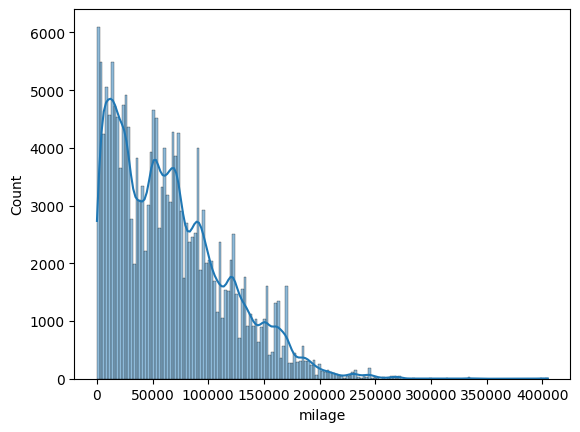

In [ ]:
sns.histplot(train_df['milage'],kde=True)
plt.show()

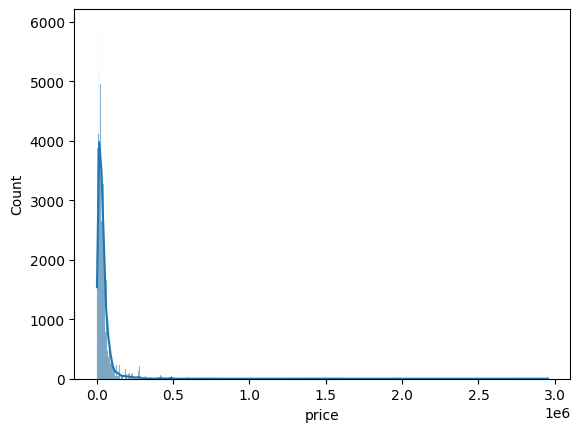

In [ ]:
sns.histplot(train_df['price'],kde=True)
plt.show()

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numeric column
numeric_columns = ['milage', 'price']
for column in numeric_columns:
    train_df = remove_outliers(train_df, column)

print(train_df.shape)


(175900, 13)


In [ ]:
fig = px.box(train_df,x='milage', title='milage Boxplot')
fig.show()

In [ ]:
fig1 = px.box(train_df,x='price', title='milage Boxplot')
fig1.show()

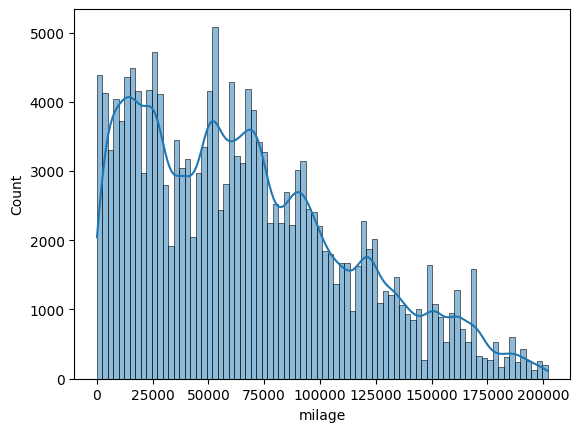

In [ ]:
sns.histplot(train_df['milage'],kde=True)
plt.show()

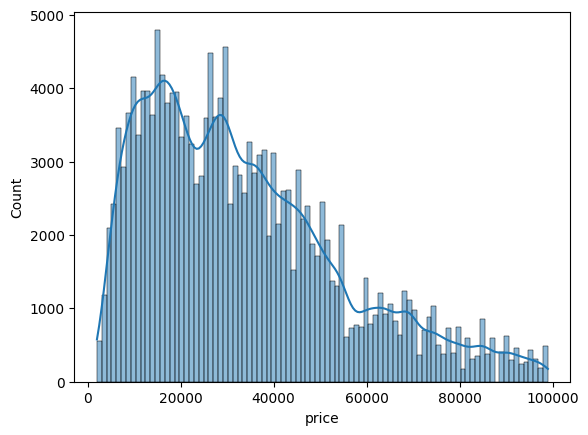

In [ ]:
sns.histplot(train_df['price'],kde=True)
plt.show()

# **Feature Engineering**

In [ ]:
current_year=2024
train_df['car_age']=current_year-train_df['model_year']  # car age

# milage per year

train_df['milage_per_year']=train_df['milage']/train_df['car_age']

train_df['milage_per_year']=train_df['milage_per_year'].replace([np.inf,-np.inf],0)

# Fuel encoding

train_df=pd.get_dummies(train_df,columns=['fuel_type'],drop_first=True)

# Trnasmission encoding

train_df=pd.get_dummies(train_df,columns=['transmission'],drop_first=True)

# Accident and clean title history

train_df['has_accident_history']=np.where((train_df['accident']=='At least 1 accident or damage reported') &(train_df['clean_title']=='Yes'),1,0)


train_df['engine_power']=train_df['engine'].str.extract(r'(\d{3}\.\d)').astype(float)

# price to milage ratio

train_df['price_milage_ratio']=train_df['price']/train_df['milage']

train_df['price_milage_ratio']=train_df['price_milage_ratio'].replace([np.inf,-np.inf],0)

# High milage

high_milage_threshold=405000  # we can set this value of data
train_df['high_milage']=np.where(train_df['milage']>high_milage_threshold,1,0)

# price per year of usage

train_df['price_per_year']=train_df['price']/train_df['car_age']

train_df['price_per_year']=train_df['price_per_year'].replace([np.inf,-np.inf],0)

# 5. Is Luxury Brand
luxury_brands = ['BMW', 'Mercedes', 'Audi', 'Porsche', 'Lexus', 'Genesis']
train_df['is_luxury'] = train_df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

# 8. Car Color Popularity
popular_colors = ['black', 'white', 'silver']
train_df['is_popular_color'] = train_df['ext_col'].apply(lambda x: 1 if x.lower() in popular_colors else 0)

# 12. Interaction Feature: Engine-Transmission Interaction
if 'transmission_Automatic' in train_df.columns:
    train_df['engine_transmission_interaction'] = train_df['engine_power'] * train_df['transmission_Automatic']
else:
    # Handle the case where neither 'transmission_manual' nor 'transmission_Automatic' exists
    # This could involve creating a dummy column or adjusting your feature engineering strategy
    pass
# Display the updated DataFrame with the new features


In [ ]:
train_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'engine', 'ext_col',
       'int_col', 'accident', 'clean_title', 'price', 'car_age',
       'milage_per_year', 'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline',
       'fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid',
       'fuel_type_not supported', 'fuel_type_–',
       'transmission_1-Speed Automatic', 'transmission_10-Speed A/T',
       'transmission_10-Speed Automatic',
       'transmission_10-Speed Automatic with Overdrive', 'transmission_2',
       'transmission_2-Speed A/T', 'transmission_2-Speed Automatic',
       'transmission_4-Speed A/T', 'transmission_4-Speed Automatic',
       'transmission_5-Speed A/T', 'transmission_5-Speed Automatic',
       'transmission_5-Speed M/T', 'transmission_6 Speed At/Mt',
       'transmission_6 Speed Mt', 'transmission_6-Speed',
       'transmission_6-Speed A/T', 'transmission_6-Speed Automatic',
       'transmission_6-Speed Automatic with Auto-Shift',
       'transmission_6-Speed Electron

In [ ]:
train_df.head()

id          brand              model  model_year  milage  \
1   1        Lincoln              LS V8        2002  143250   
2   2      Chevrolet  Silverado 2500 LT        2002  136731   
3   3        Genesis   G90 5.0 Ultimate        2017   19500   
4   4  Mercedes-Benz        Metris Base        2021    7388   
5   5           Audi      A6 2.0T Sport        2018   40950   

                                              engine ext_col int_col  \
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel  Silver   Beige   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...    Blue    Gray   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   Black   Black   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   Black   Beige   
5       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   White       –   

                                 accident clean_title  ...  \
1  At least 1 accident or damage reported         Yes  ...   
2                           None reported         Yes  ...   
3                           None reported         Yes  ...   
4                           None reported         Yes  ...   
5                           None reported         Yes  ...   

   transmission_Variable  transmission_–  has_accident_history  engine_power  \
1                  False           False                     1         252.0   
2                  False           False                     0         320.0   
3                  False           False                     0         420.0   
4                  False           False                     0         208.0   
5                  False           False                     0         252.0   

   price_milage_ratio  high_milage  price_per_year  is_luxury  \
1            0.034897            0      227.227273          0   
2            0.101659            0      631.818182          0   
3            2.307692            0     6428.571429          1   
4           13.197076            0    32500.000000          0   
5            0.731380            0     4991.666667          1   

   is_popular_color  engine_transmission_interaction  
1                 1                              0.0  
2                 0                              0.0  
3                 1                              0.0  
4                 1                              0.0  
5                 1                              0.0  

[5 rows x 78 columns]

In [ ]:
X=train_df.drop(columns=['price','price_per_year','price_milage_ratio','brand','model','engine',
                         'ext_col','int_col','accident','clean_title'])

y=train_df['price']

In [ ]:
X.head()

id  model_year  milage  car_age  milage_per_year  fuel_type_E85 Flex Fuel  \
1   1        2002  143250       22      6511.363636                    False   
2   2        2002  136731       22      6215.045455                     True   
3   3        2017   19500        7      2785.714286                    False   
4   4        2021    7388        3      2462.666667                    False   
5   5        2018   40950        6      6825.000000                    False   

   fuel_type_Gasoline  fuel_type_Hybrid  fuel_type_Plug-In Hybrid  \
1                True             False                     False   
2               False             False                     False   
3                True             False                     False   
4                True             False                     False   
5                True             False                     False   

   fuel_type_not supported  ...  transmission_Transmission Overdrive Switch  \
1                    False  ...                                       False   
2                    False  ...                                       False   
3                    False  ...                                       False   
4                    False  ...                                       False   
5                    False  ...                                       False   

   transmission_Transmission w/Dual Shift Mode  transmission_Variable  \
1                                        False                  False   
2                                        False                  False   
3                                         True                  False   
4                                        False                  False   
5                                        False                  False   

   transmission_–  has_accident_history  engine_power  high_milage  is_luxury  \
1           False                     1         252.0            0          0   
2           False                     0         320.0            0          0   
3           False                     0         420.0            0          1   
4           False                     0         208.0            0          0   
5           False                     0         252.0            0          1   

   is_popular_color  engine_transmission_interaction  
1                 1                              0.0  
2                 0                              0.0  
3                 1                              0.0  
4                 1                              0.0  
5                 1                              0.0  

[5 rows x 68 columns]

In [ ]:
X['engine_power']=X['engine_power'].fillna(X['engine_power'].mode()[0])

X['engine_transmission_interaction']=X['engine_transmission_interaction'].fillna(X['engine_transmission_interaction'].mode()[0])



In [ ]:
X.isnull().sum()

id                                 0
model_year                         0
milage                             0
car_age                            0
milage_per_year                    0
                                  ..
engine_power                       0
high_milage                        0
is_luxury                          0
is_popular_color                   0
engine_transmission_interaction    0
Length: 68, dtype: int64

In [ ]:
X=X.astype('int64')

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140720, 68)
(35180, 68)
(140720,)
(35180,)


In [ ]:
X_train.head()

id  model_year  milage  car_age  milage_per_year  \
145240  145240        2008  202000       16            12625   
81469    81469        2020   19300        4             4825   
81107    81107        2017   39800        7             5685   
142275  142275        2018   41500        6             6916   
69939    69939        2022    7500        2             3750   

        fuel_type_E85 Flex Fuel  fuel_type_Gasoline  fuel_type_Hybrid  \
145240                        0                   1                 0   
81469                         0                   1                 0   
81107                         0                   1                 0   
142275                        0                   1                 0   
69939                         0                   1                 0   

        fuel_type_Plug-In Hybrid  fuel_type_not supported  ...  \
145240                         0                        0  ...   
81469                          0                        0  ...   
81107                          0                        0  ...   
142275                         0                        0  ...   
69939                          0                        0  ...   

        transmission_Transmission Overdrive Switch  \
145240                                           0   
81469                                            0   
81107                                            0   
142275                                           0   
69939                                            0   

        transmission_Transmission w/Dual Shift Mode  transmission_Variable  \
145240                                            0                      0   
81469                                             0                      0   
81107                                             0                      0   
142275                                            0                      0   
69939                                             0                      0   

        transmission_–  has_accident_history  engine_power  high_milage  \
145240               0                     0           270            0   
81469                0                     0           425            0   
81107                0                     0           563            0   
142275               0                     0           280            0   
69939                0                     0           670            0   

        is_luxury  is_popular_color  engine_transmission_interaction  
145240          1                 0                                0  
81469           1                 1                                0  
81107           0                 0                                0  
142275          0                 1                                0  
69939           0                 1                                0  

[5 rows x 68 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.93781865, -1.36940275,  2.8877504 , ...,  1.72394882,
        -1.19114454, -0.02276036],
       [-0.23468557,  0.77225606, -1.01535392, ...,  1.72394882,
         0.83952868, -0.02276036],
       [-0.24134136,  0.23684136, -0.57740297, ..., -0.58006362,
        -1.19114454, -0.02276036],
       ...,
       [-1.2597879 ,  0.77225606, -0.80522292, ...,  1.72394882,
         0.83952868, -0.02276036],
       [ 1.53439459,  1.1291992 , -0.81240104, ..., -0.58006362,
         0.83952868, -0.02276036],
       [-1.41917757,  0.23684136,  1.73412351, ..., -0.58006362,
        -1.19114454, -0.02276036]])

In [ ]:
X_train.shape

(140720, 68)

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 187724604.8360002
R2 Score: 0.5891650573533007


In [ ]:
print(rmse)

13701.262892011095


In [ ]:
test_df=pd.read_csv("used_car_test.csv")
test_df.head()

id brand                 model  model_year  milage fuel_type  \
0  188533  Land        Rover LR2 Base        2015   98000  Gasoline   
1  188534  Land     Rover Defender SE        2020    9142    Hybrid   
2  188535  Ford    Expedition Limited        2022   28121  Gasoline   
3  188536  Audi         A6 2.0T Sport        2016   61258  Gasoline   
4  188537  Audi  A6 2.0T Premium Plus        2018   59000  Gasoline   

                                              engine        transmission  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel         6-Speed A/T   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...         8-Speed A/T   
2                    3.5L V6 24V PDI DOHC Twin Turbo  10-Speed Automatic   
3                                     2.0 Liter TFSI           Automatic   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel                 A/T   

           ext_col int_col       accident clean_title  
0            White   Beige  None reported         Yes  
1           Silver   Black  None reported         Yes  
2            White   Ebony  None reported         NaN  
3  Silician Yellow   Black  None reported         NaN  
4             Gray   Black  None reported         Yes

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB


In [ ]:
test_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [ ]:
test_df['clean_title']=test_df['clean_title'].fillna(test_df['clean_title'].mode()[0])
test_df['accident']=test_df['accident'].fillna(test_df['accident'].mode()[0])
test_df['fuel_type']=test_df['fuel_type'].fillna(test_df['fuel_type'].mode()[0])

In [ ]:
test_df.describe()

id     model_year         milage
count  125690.000000  125690.000000  125690.000000
mean   251377.500000    2015.797526   66042.581510
std     36283.722005       5.673797   50223.858435
min    188533.000000    1974.000000     100.000000
25%    219955.250000    2013.000000   24500.000000
50%    251377.500000    2017.000000   57500.000000
75%    282799.750000    2020.000000   95798.000000
max    314222.000000    2024.000000  405000.000000

In [ ]:
test_df['car_age'] = current_year - test_df['model_year']  # Car age

# Mileage per year
test_df['milage_per_year'] = test_df['milage'] / test_df['car_age']
test_df['milage_per_year'] = test_df['milage_per_year'].replace([np.inf, -np.inf], 0)

# Fuel encoding
test_df = pd.get_dummies(test_df, columns=['fuel_type'], drop_first=True)

# Transmission encoding
test_df = pd.get_dummies(test_df, columns=['transmission'], drop_first=True)

# Accident and clean title history
test_df['has_accident_history'] = np.where(
    (test_df['accident'] == 'At least 1 accident or damage reported') & (test_df['clean_title'] == 'Yes'), 1, 0
)

# Extract engine power
test_df['engine_power'] = test_df['engine'].str.extract(r'(\d{3}\.\d)').astype(float)

# Price to mileage ratio
# If price column is missing, we handle missing values in test_df
if 'price' not in test_df.columns or test_df['price'].isnull().any():
    test_df['price'] = np.nan  # Replace missing price with NaN

test_df['price_milage_ratio'] = test_df['price'] / test_df['milage']
test_df['price_milage_ratio'] = test_df['price_milage_ratio'].replace([np.inf, -np.inf], 0)

# High mileage
test_df['high_milage'] = np.where(test_df['milage'] > high_milage_threshold, 1, 0)

# Price per year of usage
test_df['price_per_year'] = test_df['price'] / test_df['car_age']
test_df['price_per_year'] = test_df['price_per_year'].replace([np.inf, -np.inf], 0)

luxury_brands = ['BMW', 'Mercedes', 'Audi', 'Porsche', 'Lexus', 'Genesis']
train_df['is_luxury'] = train_df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

# 8. Car Color Popularity
popular_colors = ['black', 'white', 'silver']
test_df['is_popular_color'] = test_df['ext_col'].apply(lambda x: 1 if x.lower() in popular_colors else 0)

# 12. Interaction Feature: Engine-Transmission Interaction
if 'transmission_Automatic' in test_df.columns:
    test_df['engine_transmission_interaction'] = test_df['engine_power'] * test_df['transmission_Automatic']
else:
    # Handle the case where neither 'transmission_manual' nor 'transmission_Automatic' exists
    # This could involve creating a dummy column or adjusting your feature engineering strategy
    pass

In [ ]:
test_df.head()

id brand                 model  model_year  milage  \
0  188533  Land        Rover LR2 Base        2015   98000   
1  188534  Land     Rover Defender SE        2020    9142   
2  188535  Ford    Expedition Limited        2022   28121   
3  188536  Audi         A6 2.0T Sport        2016   61258   
4  188537  Audi  A6 2.0T Premium Plus        2018   59000   

                                              engine          ext_col int_col  \
0       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel            White   Beige   
1  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...           Silver   Black   
2                    3.5L V6 24V PDI DOHC Twin Turbo            White   Ebony   
3                                     2.0 Liter TFSI  Silician Yellow   Black   
4       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel             Gray   Black   

        accident clean_title  ...  transmission_Variable  transmission_–  \
0  None reported         Yes  ...                  False           False   
1  None reported         Yes  ...                  False           False   
2  None reported         Yes  ...                  False           False   
3  None reported         Yes  ...                  False           False   
4  None reported         Yes  ...                  False           False   

   has_accident_history  engine_power  price  price_milage_ratio  high_milage  \
0                     0         240.0    NaN                 NaN            0   
1                     0         395.0    NaN                 NaN            0   
2                     0           NaN    NaN                 NaN            0   
3                     0           NaN    NaN                 NaN            0   
4                     0         252.0    NaN                 NaN            0   

   price_per_year  is_popular_color  engine_transmission_interaction  
0             NaN                 1                              0.0  
1             NaN                 1                              0.0  
2             NaN                 1                              NaN  
3             NaN                 0                              NaN  
4             NaN                 0                              0.0  

[5 rows x 77 columns]

In [ ]:
test_df=test_df.drop(columns=['price','price_per_year','price_milage_ratio','brand','model','engine',
                         'ext_col','int_col','accident','clean_title'])



In [ ]:
test_df.columns

Index(['id', 'model_year', 'milage', 'car_age', 'milage_per_year',
       'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'fuel_type_Plug-In Hybrid', 'fuel_type_not supported', 'fuel_type_–',
       'transmission_1-Speed Automatic', 'transmission_10-Speed A/T',
       'transmission_10-Speed Automatic',
       'transmission_10-Speed Automatic with Overdrive', 'transmission_2',
       'transmission_2-Speed A/T', 'transmission_2-Speed Automatic',
       'transmission_4-Speed A/T', 'transmission_4-Speed Automatic',
       'transmission_5-Speed A/T', 'transmission_5-Speed Automatic',
       'transmission_5-Speed M/T', 'transmission_6 Speed At/Mt',
       'transmission_6 Speed Mt', 'transmission_6-Speed',
       'transmission_6-Speed A/T', 'transmission_6-Speed Automatic',
       'transmission_6-Speed Automatic with Auto-Shift',
       'transmission_6-Speed Electronically Controlled Automatic with O',
       'transmission_6-Speed M/T', 'transmission_6-Speed Manual

In [ ]:
X.columns

Index(['id', 'model_year', 'milage', 'car_age', 'milage_per_year',
       'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'fuel_type_Plug-In Hybrid', 'fuel_type_not supported', 'fuel_type_–',
       'transmission_1-Speed Automatic', 'transmission_10-Speed A/T',
       'transmission_10-Speed Automatic',
       'transmission_10-Speed Automatic with Overdrive', 'transmission_2',
       'transmission_2-Speed A/T', 'transmission_2-Speed Automatic',
       'transmission_4-Speed A/T', 'transmission_4-Speed Automatic',
       'transmission_5-Speed A/T', 'transmission_5-Speed Automatic',
       'transmission_5-Speed M/T', 'transmission_6 Speed At/Mt',
       'transmission_6 Speed Mt', 'transmission_6-Speed',
       'transmission_6-Speed A/T', 'transmission_6-Speed Automatic',
       'transmission_6-Speed Automatic with Auto-Shift',
       'transmission_6-Speed Electronically Controlled Automatic with O',
       'transmission_6-Speed M/T', 'transmission_6-Speed Manual

In [ ]:
test_df['engine_power']=test_df['engine_power'].fillna(test_df['engine_power'].mode()[0])
test_df['engine_transmission_interaction']=test_df['engine_transmission_interaction'].fillna(test_df['engine_transmission_interaction'].mode()[0])


In [ ]:
test_df.isnull().sum()

id                                 0
model_year                         0
milage                             0
car_age                            0
milage_per_year                    0
                                  ..
has_accident_history               0
engine_power                       0
high_milage                        0
is_popular_color                   0
engine_transmission_interaction    0
Length: 67, dtype: int64

In [ ]:
test_df=test_df.astype('int64')

In [ ]:
test_df=scaler.fit_transform(test_df)

In [ ]:
test_df.shape

(125690, 67)

In [ ]:
test_df = pd.DataFrame(test_df) # convert the array back to a dataframe
#test_df.insert(0, 'id', test_df.index) # This line is not needed as 'id' already exists
test_df.columns = test_df.columns.astype(str) # convert all column names to strings
test_predictions = rf_regressor.predict(test_df)

# Step 10: Save the id and predicted values to a new file
# Create a new dataframe with the predictions
predictions_df = pd.DataFrame({'price': test_predictions})

# Concatenate the 'id' column from the original test_df (assuming 'id' was the first column)
predictions_df['id'] = test_df['id'] # Access the existing 'id' column

predictions_df[['id', 'price']].to_csv('test_predictions.csv', index=False)

print("Predictions saved to 'test_predictions.csv'.")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



Predictions saved to 'test_predictions.csv'.


In [ ]:
df=pd.read_csv("test_predictions.csv")
df.head()

In [ ]:
original_id = test_df['id'] # Store the original 'id' column

test_df = test_df.drop('id', axis=1) # Remove 'id' before transformation
test_df = test_df.astype('int64')
test_df = scaler.fit_transform(test_df)
test_df = pd.DataFrame(test_df) # convert the array back to a dataframe
test_df.columns = test_df.columns.astype(str) # convert all column names to strings
test_df['id'] = original_id # Add back the original 'id' column

test_predictions = rf_regressor.predict(test_df)

# Step 10: Save the id and predicted values to a new file
# Create a new dataframe with the predictions
predictions_df = pd.DataFrame({'price': test_predictions})

# Concatenate the 'id' column from the original test_df (assuming 'id' was the first column)
predictions_df['id'] = test_df['id'] # Access the existing 'id' column

predictions_df[['id', 'price']].to_csv('test_predictions.csv', index=False)
print("Predictions saved to 'test_predictions.csv'.")



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



Predictions saved to 'test_predictions.csv'.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Assuming you used StandardScaler

# ... (your existing code)

# Assuming your original test DataFrame is called 'original_test_df'
original_ids = scaler.inverse_transform(test_df)[:, 0] # Get original 'id' values

# Step 9: Predict values using the model
test_predictions = rf_regressor.predict(test_df)

# Step 10: Save the id and predicted values to a new file
predictions_df = pd.DataFrame({'price': test_predictions})
predictions_df['id'] = original_ids
predictions_df[['id', 'price']].to_csv('test_predictions.csv', index=False)

print("Predictions saved to 'test_predictions.csv'.")

ValueError: operands could not be broadcast together with shapes (125690,68) (67,) (125690,68) 